Import Statements

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from ast import literal_eval

## Importing Dataset

In [5]:
samples = pd.read_csv('../../../data/updated_wos/wos.complete.csv')
# samples = samples.drop('Unnamed: 0', axis=1)
display(samples)

,paper_id,category,year,keywords,cited_by
0,10.1109/AICAS54282.2022.9869942,MLAccelerator,2022,learning physical performance accelerator pote...,0
1,10.1109/FCCM51124.2021.00037,MLAccelerator,2021,structure information proprietary instruction ...,2
2,10.1109/CCGrid.2015.114,MLAccelerator,2015,learning applications accelerator services wid...,9
3,10.1109/ICECCS54210.2022.00031,MLAccelerator,2022,accelerators learning convolution framework in...,0
4,10.1109/DAC56929.2023.10247935,MLAccelerator,2023,systems component complexity increasing critic...,0
...,...,...,...,...,...
13816,10.1063/1.4795280,SpikingNN,2013,resistive presents electronic dependent design...,1
13817,10.3389/finsc.2022.818449,SpikingNN,2022,underlying activation transitions activity qua...,0
13818,10.1109/ITIME.2009.5236247,SpikingNN,2009,function model understand structures integrati...,0
13819,10.1016/j.neunet.2017.04.010,SpikingNN,2017,learning spiking methods performance sequence ...,7


In [6]:
display(samples.nsmallest(3, 'year'))

,paper_id,category,year,keywords,cited_by
846,NaN,MLAccelerator,0,NaN,0
10690,10.1007/BF00593116,SpikingNN,1971,NaN,0
10838,10.1073/pnas.86.20.7871,SpikingNN,1989,NaN,4


In [8]:
edges = pd.read_csv('../../../data/updated_wos/wos.cites.csv')
# edges = edges.drop('Unnamed: 0', axis=1)
display(edges)
# DOI is node, class is classification, and cited references show edges

,cited_paper_id,citing_paper_id
0,10.1109/CCGrid.2015.114,10.1145/2541940.2541967
1,10.1109/CCGrid.2015.114,10.1109/FCCM.2010.38
2,10.1109/DAC56929.2023.10247935,10.1145/3289602.3293915
3,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.13
4,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.12
...,...,...
53287,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2005.11.023
53288,10.1016/j.neunet.2017.04.010,10.1162/NECO_a_00450
53289,10.1016/j.neunet.2017.04.010,10.1016/j.neunet.2013.02.003
53290,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2013.06.052


In [9]:
data = samples[['paper_id','category']].copy()
data = data.drop_duplicates('paper_id')
data = data.reset_index()
display(data)

,index,paper_id,category
0,0,10.1109/AICAS54282.2022.9869942,MLAccelerator
1,1,10.1109/FCCM51124.2021.00037,MLAccelerator
2,2,10.1109/CCGrid.2015.114,MLAccelerator
3,3,10.1109/ICECCS54210.2022.00031,MLAccelerator
4,4,10.1109/DAC56929.2023.10247935,MLAccelerator
...,...,...,...
13816,13816,10.1063/1.4795280,SpikingNN
13817,13817,10.3389/finsc.2022.818449,SpikingNN
13818,13818,10.1109/ITIME.2009.5236247,SpikingNN
13819,13819,10.1016/j.neunet.2017.04.010,SpikingNN


In [11]:
wos_cites = pd.read_csv('../../../data/updated_wos/wos.cites.csv',names=['target','source'])
# wos_cites.drop(0)
# display(wos_cites)
# wos_cites = edges

wos_content = pd.read_csv('../../../data/updated_wos/wos.content.csv')
wos_content = wos_content[wos_content['paper_id'].notna()]
# wos_content
# display(wos_content)

column_names = ["paper_id"] + ["class_label"] + [word for word in wos_content['word_cited_id'].unique()] # create a word column for each feature
wos_paper = pd.read_csv('../../../data/updated_wos/wos.paper.csv',names=column_names)
wos_paper = wos_paper.drop_duplicates('paper_id')
wos_paper = wos_paper.reset_index()
# wos_paper = data.drop('index',axis=1)
# wos_paper = wos_paper.drop(0)
# display(wos_paper)

wos_cites = wos_cites.drop(0)
display(wos_cites)
wos_paper = wos_paper.drop(0)
wos_paper = wos_paper.drop('level_0',axis=1)
# wos_paper.loc[wos_paper['Class'] == 'N', 'Class'] = 'Neuromorphic'
# wos_paper = wos_paper.drop('index',axis=1)
display(wos_paper)

,target,source
1,10.1109/CCGrid.2015.114,10.1145/2541940.2541967
2,10.1109/CCGrid.2015.114,10.1109/FCCM.2010.38
3,10.1109/DAC56929.2023.10247935,10.1145/3289602.3293915
4,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.13
5,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.12
...,...,...
53288,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2005.11.023
53289,10.1016/j.neunet.2017.04.010,10.1162/NECO_a_00450
53290,10.1016/j.neunet.2017.04.010,10.1016/j.neunet.2013.02.003
53291,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2013.06.052


,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
1,10.1109/AICAS54282.2022.9869942,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1109/FCCM51124.2021.00037,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.1109/CCGrid.2015.114,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1109/ICECCS54210.2022.00031,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10.1109/DAC56929.2023.10247935,MLAccelerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13817,10.1063/1.4795280,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13818,10.3389/finsc.2022.818449,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13819,10.1109/ITIME.2009.5236247,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13820,10.1016/j.neunet.2017.04.010,SpikingNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(len(wos_content['word_cited_id'].unique()))

6821


In [13]:
# Initialize each word vector to 0
wos_paper = wos_paper.set_index('paper_id')
for word in wos_content['word_cited_id'].unique():
    wos_paper[word] = 0


In [14]:
# declare the true values for each word vector
for index, row in wos_content.iterrows(): # mark as true for words used by each paper
    wos_paper.at[str(row['paper_id']), str(row['word_cited_id'])] = 1


In [15]:
display(wos_paper)

,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,practical,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
paper_id,,,,,,,,,,,,,,,,,,,,,
10.1109/AICAS54282.2022.9869942,MLAccelerator,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10.1109/FCCM51124.2021.00037,MLAccelerator,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/CCGrid.2015.114,MLAccelerator,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ICECCS54210.2022.00031,MLAccelerator,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/DAC56929.2023.10247935,MLAccelerator,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1063/1.4795280,SpikingNN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10.3389/finsc.2022.818449,SpikingNN,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ITIME.2009.5236247,SpikingNN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
wos_paper = wos_paper.dropna() # remove null values
display(wos_paper)

,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,practical,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
paper_id,,,,,,,,,,,,,,,,,,,,,
10.1109/AICAS54282.2022.9869942,MLAccelerator,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10.1109/FCCM51124.2021.00037,MLAccelerator,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/CCGrid.2015.114,MLAccelerator,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ICECCS54210.2022.00031,MLAccelerator,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/DAC56929.2023.10247935,MLAccelerator,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1063/1.4795280,SpikingNN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10.3389/finsc.2022.818449,SpikingNN,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/ITIME.2009.5236247,SpikingNN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
wos_paper = wos_paper.reset_index()
print(wos_paper.shape)
display(wos_paper)

(13821, 6823)


,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
0,10.1109/AICAS54282.2022.9869942,MLAccelerator,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10.1109/FCCM51124.2021.00037,MLAccelerator,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.1109/CCGrid.2015.114,MLAccelerator,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.1109/ICECCS54210.2022.00031,MLAccelerator,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.1109/DAC56929.2023.10247935,MLAccelerator,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,10.1063/1.4795280,SpikingNN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13817,10.3389/finsc.2022.818449,SpikingNN,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13818,10.1109/ITIME.2009.5236247,SpikingNN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13819,10.1016/j.neunet.2017.04.010,SpikingNN,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
wos_cites = wos_cites[wos_cites['source'].isin(wos_paper['paper_id'])] # remove edges that are not in wos_paper
wos_cites = wos_cites[wos_cites['target'].isin(wos_paper['paper_id'])]

In [19]:
display(wos_cites)

,target,source
1,10.1109/CCGrid.2015.114,10.1145/2541940.2541967
2,10.1109/CCGrid.2015.114,10.1109/FCCM.2010.38
3,10.1109/DAC56929.2023.10247935,10.1145/3289602.3293915
4,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.13
5,10.1109/DAC56929.2023.10247935,10.1109/ISCA.2016.12
...,...,...
53288,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2005.11.023
53289,10.1016/j.neunet.2017.04.010,10.1162/NECO_a_00450
53290,10.1016/j.neunet.2017.04.010,10.1016/j.neunet.2013.02.003
53291,10.1016/j.neunet.2017.04.010,10.1016/j.neucom.2013.06.052


In [20]:
class_values = sorted(wos_paper["class_label"].unique()) # one hot encoding of rest of variables
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate((wos_paper["paper_id"].unique()))}

wos_cites["source"] = wos_cites["source"].apply(lambda name: paper_idx[name])
wos_cites["target"] = wos_cites["target"].apply(lambda name: paper_idx[name])
wos_paper["paper_id"] = wos_paper["paper_id"].apply(lambda name: paper_idx[name])
wos_paper["class_label"] = wos_paper["class_label"].apply(lambda value: class_idx[value])

In [21]:
plt.figure(figsize=(10, 10))
colors = wos_paper["class_label"].tolist()
wos_graph = nx.from_pandas_edgelist(wos_cites)#.sample(n=1500))
wos_graph = wos_graph.subgraph(sorted(nx.connected_components(wos_graph), key=len, reverse=True)[0])
subjects = list(wos_paper[wos_paper["paper_id"].isin(list(wos_graph.nodes))]["class_label"])
# nx.draw_spring(wos_graph, node_size=15, node_color=subjects)

<Figure size 1000x1000 with 0 Axes>

In [22]:
wos_df = nx.to_pandas_edgelist(wos_graph)
display(wos_df)

,source,target
0,10,2
1,10,8
2,10,13664
3,10,12853
4,10,17
...,...,...
52885,13442,13606
52886,13447,13446
52887,13572,12568
52888,13587,13606


In [36]:
display(new_samples1, new_samples2)

,paper_id,category,year,keywords,cited_by
1,10.1109/FCCM51124.2021.00037,MLAccelerator,2021,structure information proprietary instruction ...,2
2,10.1109/CCGrid.2015.114,MLAccelerator,2015,learning applications accelerator services wid...,9
4,10.1109/DAC56929.2023.10247935,MLAccelerator,2023,systems component complexity increasing critic...,0
8,10.1109/TPDS.2020.2990924,MLAccelerator,2020,applications accelerator instruction intensive...,3
10,10.1145/2541940.2541967,MLAccelerator,2014,systems centers broad domains pervasive convol...,131
...,...,...,...,...,...
13809,10.1109/TED.2012.2197951,SpikingNN,2012,potentiation depression system systems synapse...,45
13811,10.1109/MM.2018.112130359,SpikingNN,2018,spiking conventional modeling fabricated netwo...,572
13812,10.1063/1.3076394,SpikingNN,2009,heterogeneity different structure connections ...,12
13813,10.1371/journal.pcbi.1006897,SpikingNN,2019,computations spiking activity convolutional ap...,3


,paper_id,category,year,keywords,cited_by
1,10.1109/FCCM51124.2021.00037,MLAccelerator,2021,structure information proprietary instruction ...,2
2,10.1109/CCGrid.2015.114,MLAccelerator,2015,learning applications accelerator services wid...,9
4,10.1109/DAC56929.2023.10247935,MLAccelerator,2023,systems component complexity increasing critic...,0
8,10.1109/TPDS.2020.2990924,MLAccelerator,2020,applications accelerator instruction intensive...,3
12,10.3390/electronics7080130,MLAccelerator,2018,accelerator interconnects computing accelerati...,0
...,...,...,...,...,...
13814,10.1103/PhysRevE.81.021901,SpikingNN,2010,subthreshold response model structure statisti...,1
13816,10.1063/1.4795280,SpikingNN,2013,resistive presents electronic dependent design...,1
13817,10.3389/finsc.2022.818449,SpikingNN,2022,underlying activation transitions activity qua...,0
13819,10.1016/j.neunet.2017.04.010,SpikingNN,2017,learning spiking methods performance sequence ...,7


In [23]:
new_samples1 = samples[samples['paper_id'].isin(wos_df['source'])]
new_samples2 = samples[samples['paper_id'].isin(wos_df['target'])]
new_samples = pd.concat([new_samples1, new_samples2])
new_samples = new_samples.drop_duplicates()
display(new_samples)

,paper_id,category,year,keywords,cited_by


In [40]:
new_samples.to_csv('../../data/updated_wos/wos.complete.connected.csv')

In [24]:
plt.figure(figsize=(10, 10))
colors = wos_paper["class_label"].tolist()
wos_graph = nx.from_pandas_edgelist(wos_cites)#.sample(n=1500))
wos_graph = wos_graph.subgraph(sorted(nx.connected_components(wos_graph), key=len, reverse=True)[0])
subjects = list(wos_paper[wos_paper["paper_id"].isin(list(wos_graph.nodes))]["class_label"])
# nx.draw_spring(wos_graph, node_size=15, node_color=subjects)

<Figure size 1000x1000 with 0 Axes>

## Graph Characteristics

In [34]:
# finding characteristics of Graph
print(nx.average_clustering(wos_graph))
# print(nx.average_shortest_path_length(wos_graph))
print(min([nx.diameter(wos_graph.subgraph(g).copy()) for g in nx.connected_components(wos_graph)]))
print(nx.average_degree_connectivity(wos_graph))
print(np.average([j for i,j in wos_graph.degree()]))

0.15905916986725174
18
{133: 12.849624060150376, 11: 69.95501405810684, 3: 64.846408839779, 8: 72.11693548387096, 5: 67.8832298136646, 132: 32.27651515151515, 175: 21.571428571428573, 14: 72.11562746645619, 126: 30.591269841269842, 35: 54.90310559006211, 32: 56.44831730769231, 52: 56.49423076923077, 31: 49.348387096774196, 2: 59.450989208633096, 6: 70.83860342555995, 1: 55.289147851420246, 4: 67.10266666666666, 80: 35.284375, 9: 68.86429872495447, 10: 75.06575342465753, 22: 60.505050505050505, 24: 52.75240384615385, 12: 70.95006887052341, 17: 68.35988883742473, 29: 65.11405835543766, 84: 20.61904761904762, 23: 59.13833992094862, 182: 15.961538461538462, 13: 70.17948717948718, 7: 74.64929356357928, 19: 74.69508009153319, 62: 42.81797235023041, 20: 62.86265060240964, 215: 32.79767441860465, 136: 47.720588235294116, 18: 66.64627930682977, 25: 59.22742857142857, 91: 47.0989010989011, 26: 59.403496503496505, 30: 60.18214285714286, 111: 28.315315315315317, 40: 52.63333333333333, 16: 66.97713

In [25]:
print(len(wos_graph.nodes))
print(len(wos_graph.edges))

9561
52890


## Node Classification

base neural net

In [26]:
train_data, test_data = [], []

for _, group_data in wos_paper.groupby("class_label"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.8
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (11058, 6823)
Test data shape: (2763, 6823)


In [27]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 100
batch_size = 256

In [28]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="lower right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)



In [32]:
print(wos_paper.types)

0        0
1        0
2        0
3        0
4        0
        ..
13816    0
13817    0
13818    0
13819    0
13820    0
Name: types, Length: 13821, dtype: int64


In [29]:
feature_names = set(wos_paper.columns) - {"paper_id", "class_label"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["class_label"]
y_test = test_data["class_label"]

In [30]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 6821)]       0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           246772      ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [31]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/100
37/37 [==============================] - 5s 52ms/step - loss: 1.7475 - acc: 0.3462 - val_loss: 1.6330 - val_acc: 0.3201
Epoch 2/100
37/37 [==============================] - 1s 36ms/step - loss: 1.1976 - acc: 0.4892 - val_loss: 1.2443 - val_acc: 0.3689
Epoch 3/100
 3/37 [=>............................] - ETA: 1s - loss: 1.0457 - acc: 0.5716

KeyboardInterrupt: 

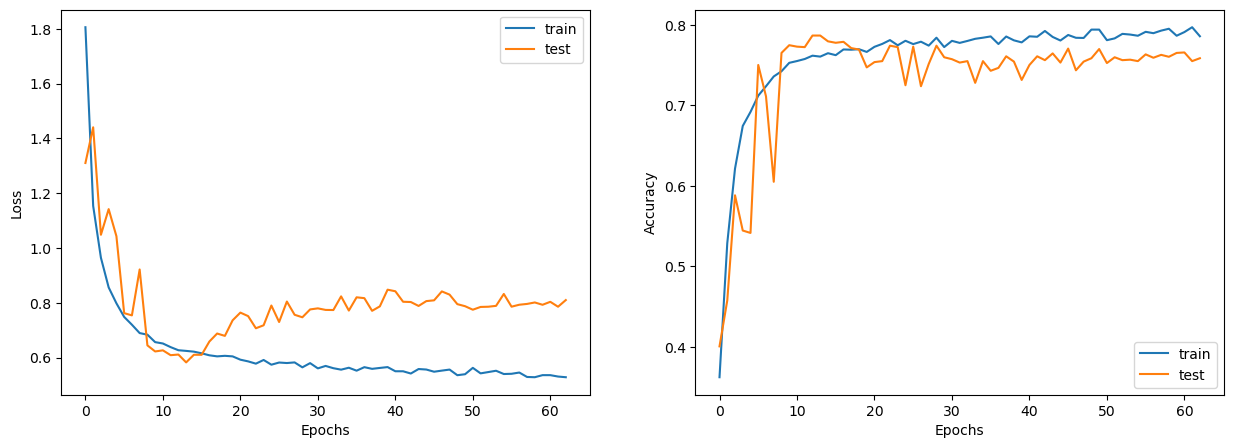

Test accuracy: 76.96%


In [44]:
display_learning_curves(history)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [45]:
def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")


In [46]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 [==============================] - 0s 480ms/step
Instance 1:
- EdgeML: 26.92%
- MLAccelerator: 3.13%
- Neuromorphic: 18.93%
- SpikingNN: 51.01%
Instance 2:
- EdgeML: 29.26%
- MLAccelerator: 1.59%
- Neuromorphic: 34.4%
- SpikingNN: 34.75%
Instance 3:
- EdgeML: 9.32%
- MLAccelerator: 1.63%
- Neuromorphic: 81.96%
- SpikingNN: 7.09%
Instance 4:
- EdgeML: 7.37%
- MLAccelerator: 2.76%
- Neuromorphic: 47.01%
- SpikingNN: 42.86%


GNN

In [48]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = wos_cites[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    wos_paper.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)


Edges shape: (2, 53292)
Nodes shape: (13821, 6821)


In [46]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


In [47]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)


In [51]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[ 0.01803308  0.02547863 -0.03824959 -0.0301445 ]
 [-0.02882827 -0.01042566  0.11063403  0.00448829]
 [-0.0723239  -0.05534748  0.0500371   0.04421021]], shape=(3, 4), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (13821, 32)               246772    
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Sequential)    (13821, 32)               2368      
                                          

In [53]:
x_train = train_data.paper_id.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)


Epoch 1/300
37/37 [==============================] - 76s 2s/step - loss: 1.3828 - acc: 0.3204 - val_loss: 1.3402 - val_acc: 0.3177
Epoch 2/300
37/37 [==============================] - 69s 2s/step - loss: 1.2945 - acc: 0.3851 - val_loss: 1.3617 - val_acc: 0.3177
Epoch 3/300
37/37 [==============================] - 66s 2s/step - loss: 1.1895 - acc: 0.4737 - val_loss: 1.9803 - val_acc: 0.3177
Epoch 4/300
37/37 [==============================] - 68s 2s/step - loss: 1.0677 - acc: 0.5649 - val_loss: 2.0497 - val_acc: 0.3177
Epoch 5/300
37/37 [==============================] - 68s 2s/step - loss: 0.9728 - acc: 0.6236 - val_loss: 2.3472 - val_acc: 0.3177
Epoch 6/300
37/37 [==============================] - 69s 2s/step - loss: 0.8886 - acc: 0.6729 - val_loss: 2.1946 - val_acc: 0.3393
Epoch 7/300
37/37 [==============================] - 67s 2s/step - loss: 0.8337 - acc: 0.6901 - val_loss: 1.5024 - val_acc: 0.3735
Epoch 8/300
37/37 [==============================] - 67s 2s/step - loss: 0.7916 - a

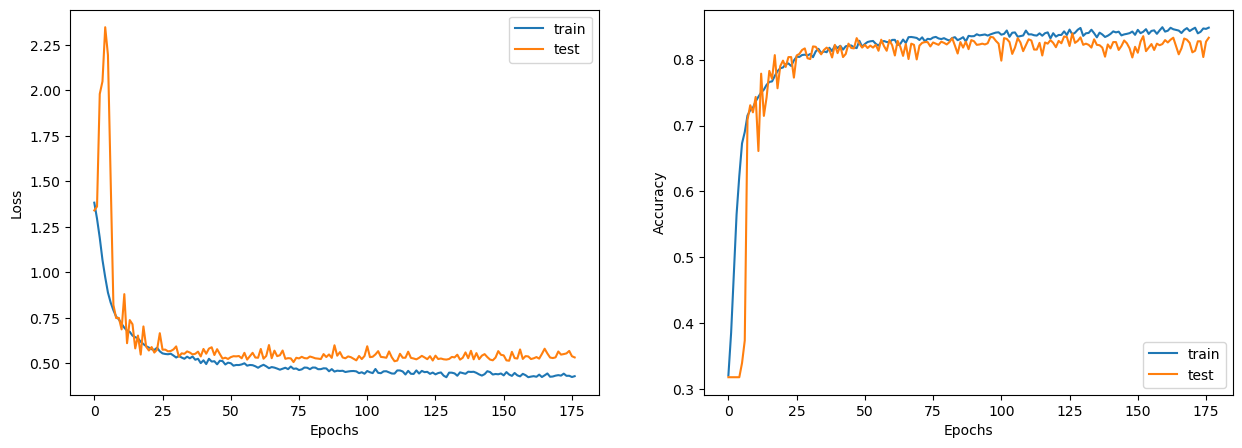

Test accuracy: 81.77%


In [55]:
display_learning_curves(history)
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

## Link Prediction

In [55]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding
from stellargraph import StellarGraph


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [57]:
node_features = wos_paper[wos_paper['paper_id'].isin(wos_graph.nodes)]
wos = StellarGraph.from_networkx(wos_graph,node_features=node_features.set_index('paper_id').drop('class_label',axis=1))
print(wos.info())

StellarGraph: Undirected multigraph
 Nodes: 9561, Edges: 52890

 Node types:
  default: [9561]
    Features: float32 vector, length 6821
    Edge types: default-default->default

 Edge types:
    default-default->default: [52890]
        Weights: all 1 (default)
        Features: none


In [58]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(wos)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 5289 positive and 5289 negative edges. **


In [59]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True
)



** Sampled 4760 positive and 4760 negative edges. **


In [60]:
epochs = 40

In [61]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [62]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [63]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)

In [64]:
x_inp, x_out = gcn.in_out_tensors()

In [65]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

In [66]:
prediction = keras.layers.Reshape((-1,))(prediction)

In [67]:
model = keras.Model(inputs=x_inp, outputs=prediction)

history = model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [68]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 1s 704ms/step - loss: 3.5577 - binary_accuracy: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 3.5576
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 3.5577
	binary_accuracy: 0.5000


In [69]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/40
1/1 - 4s - loss: 3.5674 - binary_accuracy: 0.5000 - val_loss: 0.9751 - val_binary_accuracy: 0.5187 - 4s/epoch - 4s/step
Epoch 2/40
1/1 - 2s - loss: 0.9738 - binary_accuracy: 0.5185 - val_loss: 0.5530 - val_binary_accuracy: 0.7346 - 2s/epoch - 2s/step
Epoch 3/40
1/1 - 2s - loss: 0.5666 - binary_accuracy: 0.7274 - val_loss: 0.9300 - val_binary_accuracy: 0.7139 - 2s/epoch - 2s/step
Epoch 4/40
1/1 - 2s - loss: 1.0537 - binary_accuracy: 0.6998 - val_loss: 1.5321 - val_binary_accuracy: 0.6101 - 2s/epoch - 2s/step
Epoch 5/40
1/1 - 2s - loss: 1.7099 - binary_accuracy: 0.6259 - val_loss: 1.5592 - val_binary_accuracy: 0.6081 - 2s/epoch - 2s/step
Epoch 6/40
1/1 - 2s - loss: 1.8414 - binary_accuracy: 0.6099 - val_loss: 1.1248 - val_binary_accuracy: 0.6830 - 2s/epoch - 2s/step
Epoch 7/40
1/1 - 2s - loss: 1.2145 - binary_accuracy: 0.6827 - val_loss: 0.7166 - val_binary_accuracy: 0.7784 - 2s/epoch - 2s/step
Epoch 8/40
1/1 - 2s - loss: 0.8217 - binary_accuracy: 0.7512 - val_loss: 0.5411 - v

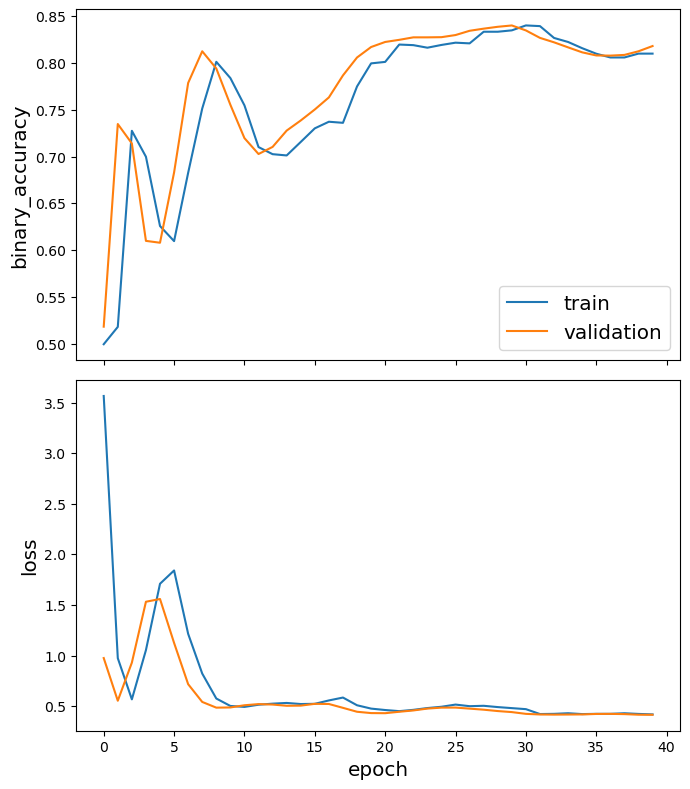

In [70]:
sg.utils.plot_history(history)

In [71]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 1s 1s/step - loss: 0.4140 - binary_accuracy: 0.8177

Train Set Metrics of the trained model:
	loss: 0.3933
	binary_accuracy: 0.8264

Test Set Metrics of the trained model:
	loss: 0.4140
	binary_accuracy: 0.8177


## PCA

In [35]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [36]:
features = wos_paper.drop(['paper_id','class_label'], axis=1)

In [21]:
pca = PCA(n_components=0.8)
pca.fit(features)
data_pca = pd.DataFrame(pca.transform(features))
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,751,752,753,754,755,756,757,758,759,760
0,-0.249467,0.791865,0.331891,-0.122196,0.449785,1.074092,0.479726,0.124412,-0.210755,0.295907,...,-0.024353,0.014860,0.003418,-0.005476,0.000420,-0.000343,-0.004946,0.007575,0.010537,0.009153
1,-0.260904,1.053012,-0.350754,-0.042920,-0.178968,-0.103744,-0.398584,0.023092,-0.032026,0.214934,...,0.035361,0.039720,0.022709,0.013607,0.000701,0.001830,-0.014594,-0.025628,0.003697,-0.003480
2,-0.182113,1.113352,-0.388938,-0.035324,-0.214538,-0.018511,-0.296767,-0.021717,-0.028078,0.148842,...,0.008883,0.014513,-0.129815,-0.055755,-0.060208,0.109656,-0.025610,-0.054697,-0.117845,-0.004948
3,-0.426581,0.753956,0.298866,-0.255267,0.069234,0.003629,-0.115966,-0.197423,-0.017386,-0.005956,...,-0.004359,0.010925,0.019631,-0.000835,-0.017921,0.003850,0.003258,-0.020508,0.006867,0.012978
4,-0.067727,-0.030785,-0.124672,-0.113059,0.337220,0.852294,-0.153300,0.350926,-0.062020,-0.246878,...,-0.003660,0.008096,0.004871,-0.002605,0.003612,0.004543,0.000218,-0.000053,-0.001950,-0.011466


In [37]:
reduced_wos_papers = wos_paper[['paper_id','class_label']].join(data_pca)
display(reduced_wos_papers)

,paper_id,class_label,0,1,2,3,4,5,6,7,...,751,752,753,754,755,756,757,758,759,760
0,0,1,-0.249467,0.791865,0.331891,-0.122196,0.449785,1.074092,0.479726,0.124412,...,-0.024353,0.014860,0.003418,-0.005476,0.000420,-0.000343,-0.004946,0.007575,0.010537,0.009153
1,1,1,-0.260904,1.053012,-0.350754,-0.042920,-0.178968,-0.103744,-0.398584,0.023092,...,0.035361,0.039720,0.022709,0.013607,0.000701,0.001830,-0.014594,-0.025628,0.003697,-0.003480
2,2,1,-0.182113,1.113352,-0.388938,-0.035324,-0.214538,-0.018511,-0.296767,-0.021717,...,0.008883,0.014513,-0.129815,-0.055755,-0.060208,0.109656,-0.025610,-0.054697,-0.117845,-0.004948
3,3,1,-0.426581,0.753956,0.298866,-0.255267,0.069234,0.003629,-0.115966,-0.197423,...,-0.004359,0.010925,0.019631,-0.000835,-0.017921,0.003850,0.003258,-0.020508,0.006867,0.012978
4,4,1,-0.067727,-0.030785,-0.124672,-0.113059,0.337220,0.852294,-0.153300,0.350926,...,-0.003660,0.008096,0.004871,-0.002605,0.003612,0.004543,0.000218,-0.000053,-0.001950,-0.011466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,13816,3,-0.175457,-0.256684,-0.103540,-0.314317,-0.148893,-0.027974,-0.090287,-0.124739,...,-0.050586,0.029005,0.004641,0.048630,-0.010490,0.020346,0.006804,-0.003801,0.061694,0.065953
13817,13817,3,-0.195518,-0.303361,-0.037926,-0.229190,0.213451,0.793825,-0.271318,0.422477,...,0.077456,0.031773,0.069696,0.004914,0.066279,0.125601,-0.047753,-0.058285,0.047258,0.027156
13818,13818,3,-0.253524,-0.238406,-0.037725,-0.292472,-0.094411,-0.044208,-0.043711,-0.063244,...,-0.021910,0.014486,0.010875,0.019879,0.002780,-0.041616,-0.011517,-0.038261,-0.004408,0.023730
13819,13819,3,-0.624182,0.631536,0.423460,0.031074,0.070055,0.162866,0.610358,-0.193332,...,0.056416,0.018182,0.012404,-0.000682,-0.017864,0.048626,0.013888,-0.034482,0.022756,-0.016706


Base NN

In [38]:
train_data, test_data = [], []

for _, group_data in reduced_wos_papers.groupby("class_label"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.8
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (11009, 763)
Test data shape: (2812, 763)


In [40]:
feature_names = set(reduced_wos_papers.columns) - {"paper_id", "class_label"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["class_label"]
y_test = test_data["class_label"]

In [41]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 761)]        0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           28612       ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [42]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/100
37/37 [==============================] - 10s 52ms/step - loss: 1.7078 - acc: 0.3048 - val_loss: 1.3310 - val_acc: 0.3529
Epoch 2/100
37/37 [==============================] - 1s 22ms/step - loss: 1.3699 - acc: 0.3451 - val_loss: 1.2930 - val_acc: 0.4867
Epoch 3/100
37/37 [==============================] - 1s 24ms/step - loss: 1.2725 - acc: 0.4127 - val_loss: 1.2088 - val_acc: 0.5272
Epoch 4/100
37/37 [==============================] - 1s 21ms/step - loss: 1.1764 - acc: 0.4776 - val_loss: 1.0191 - val_acc: 0.6762
Epoch 5/100
37/37 [==============================] - 1s 23ms/step - loss: 1.0980 - acc: 0.5360 - val_loss: 0.9210 - val_acc: 0.6973
Epoch 6/100
37/37 [==============================] - 1s 21ms/step - loss: 1.0450 - acc: 0.5592 - val_loss: 0.8691 - val_acc: 0.7415
Epoch 7/100
37/37 [==============================] - 1s 20ms/step - loss: 1.0192 - acc: 0.5790 - val_loss: 0.8129 - val_acc: 0.7470
Epoch 8/100
37/37 [==============================] - 1s 20ms/step - loss: 0

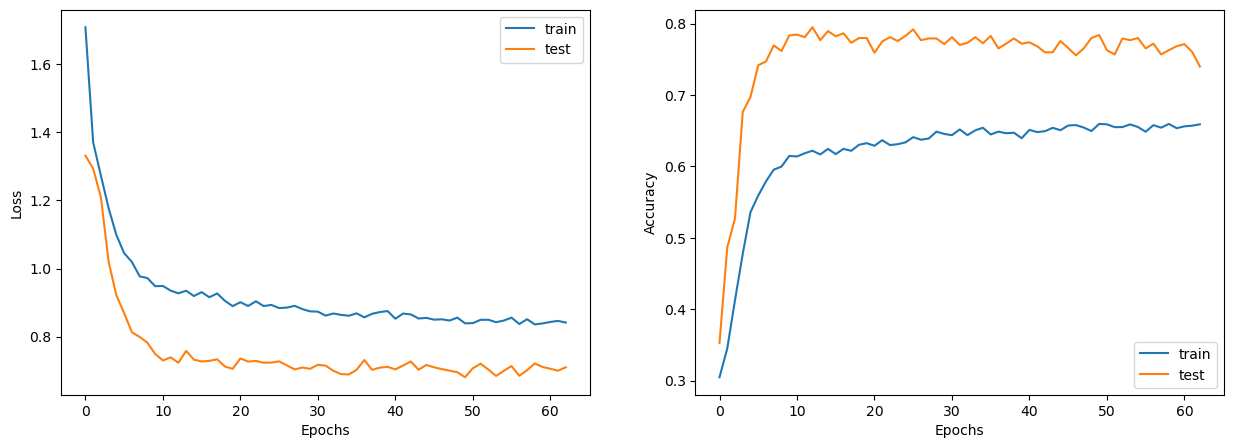

Test accuracy: 77.35%


In [43]:
display_learning_curves(history)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [48]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 [==============================] - 1s 756ms/step
Instance 1:
- EdgeML: 26.97%
- MLAccelerator: 8.01%
- Neuromorphic: 38.46%
- SpikingNN: 26.57%
Instance 2:
- EdgeML: 26.97%
- MLAccelerator: 8.01%
- Neuromorphic: 38.46%
- SpikingNN: 26.57%
Instance 3:
- EdgeML: 26.97%
- MLAccelerator: 8.01%
- Neuromorphic: 38.46%
- SpikingNN: 26.57%
Instance 4:
- EdgeML: 26.97%
- MLAccelerator: 8.01%
- Neuromorphic: 38.46%
- SpikingNN: 26.57%


GNN Node Classification

In [50]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = wos_cites[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    reduced_wos_papers.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 53292)
Nodes shape: (13821, 761)


In [51]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[-0.09447108  0.04745463 -0.01201311 -0.0808491 ]
 [-0.05549661  0.07347211  0.06014562  0.02030228]
 [-0.07777654  0.0815971  -0.01433438  0.0970934 ]], shape=(3, 4), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (13821, 32)               28612     
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Sequential)    (13821, 32)               2368      
                                          

In [52]:
x_train = train_data.paper_id.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/100
37/37 [==============================] - 36s 741ms/step - loss: 1.4271 - acc: 0.2936 - val_loss: 1.3275 - val_acc: 0.3166
Epoch 2/100
37/37 [==============================] - 24s 638ms/step - loss: 1.3282 - acc: 0.3159 - val_loss: 1.3171 - val_acc: 0.3166
Epoch 3/100
37/37 [==============================] - 23s 624ms/step - loss: 1.3172 - acc: 0.3241 - val_loss: 1.3093 - val_acc: 0.3354
Epoch 4/100
37/37 [==============================] - 26s 690ms/step - loss: 1.3068 - acc: 0.3404 - val_loss: 1.2812 - val_acc: 0.4479
Epoch 5/100
37/37 [==============================] - 24s 661ms/step - loss: 1.2786 - acc: 0.3846 - val_loss: 1.1341 - val_acc: 0.5176
Epoch 6/100
37/37 [==============================] - 23s 611ms/step - loss: 1.2068 - acc: 0.4605 - val_loss: 0.9347 - val_acc: 0.6507
Epoch 7/100
37/37 [==============================] - 22s 608ms/step - loss: 1.1233 - acc: 0.5258 - val_loss: 0.8059 - val_acc: 0.7100
Epoch 8/100
37/37 [==============================] - 23s 623ms

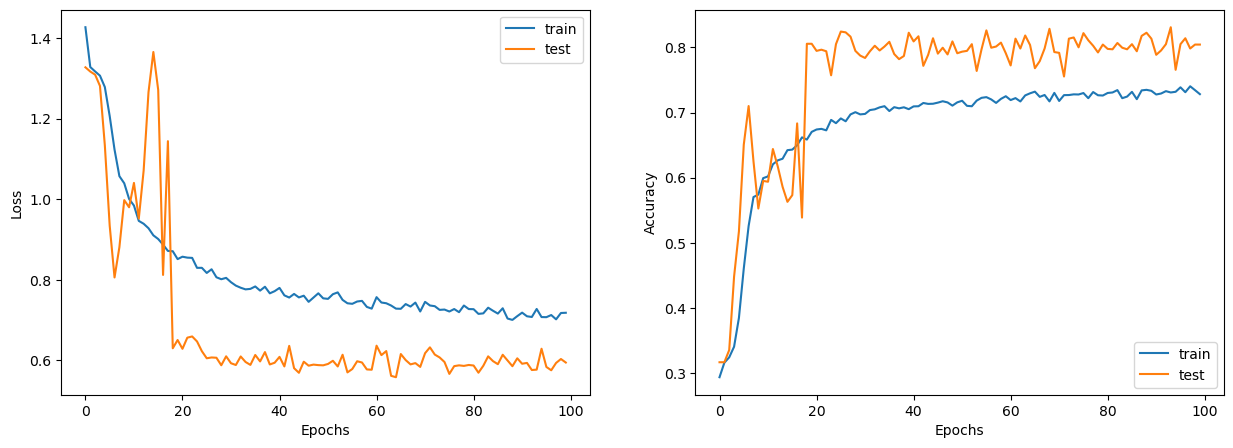

Test accuracy: 78.06%


In [53]:
display_learning_curves(history)
x_test = test_data.paper_id.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Link Prediction

In [56]:
node_features = reduced_wos_papers[reduced_wos_papers['paper_id'].isin(wos_graph.nodes)]
wos = StellarGraph.from_networkx(wos_graph,node_features=node_features.set_index('paper_id').drop('class_label',axis=1))
print(wos.info())

StellarGraph: Undirected multigraph
 Nodes: 9561, Edges: 52890

 Node types:
  default: [9561]
    Features: float32 vector, length 761
    Edge types: default-default->default

 Edge types:
    default-default->default: [52890]
        Weights: all 1 (default)
        Features: none


In [57]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(wos)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 5289 positive and 5289 negative edges. **


In [58]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True
)


** Sampled 4760 positive and 4760 negative edges. **


In [59]:
epochs = 40

In [60]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [64]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [61]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)
x_inp, x_out = gcn.in_out_tensors()


In [62]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)
prediction = keras.layers.Reshape((-1,))(prediction)
model = keras.Model(inputs=x_inp, outputs=prediction)

In [65]:
history = model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

1/1 [==============================] - 0s 134ms/step - loss: 2.5515 - binary_accuracy: 0.5000


In [66]:
print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))


Train Set Metrics of the initial (untrained) model:
	loss: 2.5507
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 2.5515
	binary_accuracy: 0.5000


In [67]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/40
1/1 - 2s - loss: 2.4575 - binary_accuracy: 0.5000 - val_loss: 1.6478 - val_binary_accuracy: 0.5000 - 2s/epoch - 2s/step
Epoch 2/40
1/1 - 0s - loss: 1.5846 - binary_accuracy: 0.5000 - val_loss: 1.1451 - val_binary_accuracy: 0.5072 - 266ms/epoch - 266ms/step
Epoch 3/40
1/1 - 0s - loss: 1.1130 - binary_accuracy: 0.5070 - val_loss: 0.8069 - val_binary_accuracy: 0.5638 - 278ms/epoch - 278ms/step
Epoch 4/40
1/1 - 0s - loss: 0.8023 - binary_accuracy: 0.5639 - val_loss: 0.5853 - val_binary_accuracy: 0.6814 - 271ms/epoch - 271ms/step
Epoch 5/40
1/1 - 0s - loss: 0.5845 - binary_accuracy: 0.6869 - val_loss: 0.4915 - val_binary_accuracy: 0.7792 - 270ms/epoch - 270ms/step
Epoch 6/40
1/1 - 0s - loss: 0.4916 - binary_accuracy: 0.7798 - val_loss: 0.5593 - val_binary_accuracy: 0.8109 - 271ms/epoch - 271ms/step
Epoch 7/40
1/1 - 0s - loss: 0.5690 - binary_accuracy: 0.8035 - val_loss: 0.7198 - val_binary_accuracy: 0.7943 - 271ms/epoch - 271ms/step
Epoch 8/40
1/1 - 0s - loss: 0.7774 - binary_acc

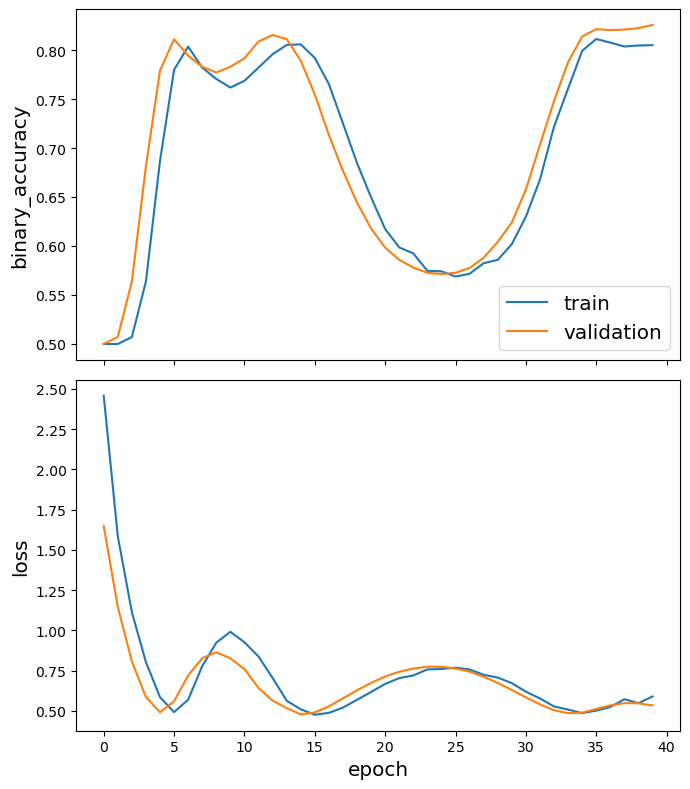

In [68]:
sg.utils.plot_history(history)

In [69]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

1/1 [==============================] - 0s 136ms/step - loss: 0.5332 - binary_accuracy: 0.8256


In [70]:
print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))


Train Set Metrics of the trained model:
	loss: 0.4942
	binary_accuracy: 0.8282

Test Set Metrics of the trained model:
	loss: 0.5332
	binary_accuracy: 0.8256


## TSNE

In [71]:
import dgl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from dgl.nn import GraphConv
import torch.nn.functional as F
import numpy as np
from sklearn.manifold import TSNE

c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [72]:
display(wos_paper)

,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,13816,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13817,13817,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13818,13818,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13819,13819,3,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
subset = wos_paper[wos_paper['paper_id'].isin(wos_graph.nodes)]
# node_features = tf.cast(
#     subset.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
# )
node_features = subset.drop(['paper_id','class_label'],axis=1)
node_labels = subset['class_label']
n_features = node_features.shape[0]
# node_labels = wos_paper[wos_paper['DOI'].isin(list(wos_graph.nodes))].sort_values('DOI')['Class']
n_labels = int(node_labels.max() + 1)

In [74]:
# perform TSNE and visualize
tsne = TSNE(n_components=2)
tsne_res = tsne.fit_transform(node_features)

C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [75]:
display(wos_paper)
print(node_features)
print(node_labels)

,paper_id,class_label,learning,physical,performance,accelerator,potential,communication,systems,computational,...,educators,psychologists,way,collation,viewpoint,anatomy,compartments,circadian,regulates,purposely
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13816,13816,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13817,13817,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13818,13818,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13819,13819,3,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


       learning  physical  performance  accelerator  potential  communication  \
1             1         0            0            0          0              0   
2             1         0            0            1          0              0   
4             0         0            0            0          0              1   
8             0         0            0            1          0              0   
10            1         0            0            0          0              0   
...         ...       ...          ...          ...        ...            ...   
13814         0         0            0            0          0              0   
13816         0         0            0            0          0              0   
13817         0         0            0            0          0              0   
13819         1         0            1            0          0              0   
13820         1         0            0            0          0              0   

       systems  computation

T-SNE of WoS before PCA

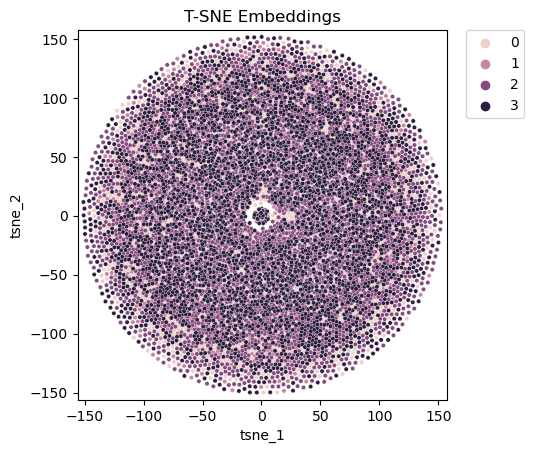

In [76]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_res[:,0], 'tsne_2': tsne_res[:,1], 'label': node_labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_res.min()-5, tsne_res.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_title('T-SNE Embeddings')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [77]:
subset = reduced_wos_papers[reduced_wos_papers['paper_id'].isin(wos_graph.nodes)]
# node_features = tf.cast(
#     subset.sort_values("paper_id")[feature_names].to_numpy(), dtype=tf.dtypes.float32
# )
node_features = subset.drop(['paper_id','class_label'],axis=1)
node_labels = subset['class_label']
n_features = node_features.shape[0]
# node_labels = wos_paper[wos_paper['DOI'].isin(list(wos_graph.nodes))].sort_values('DOI')['Class']
n_labels = int(node_labels.max() + 1)

In [78]:
# perform TSNE and visualize
tsne = TSNE(n_components=2)
tsne_res = tsne.fit_transform(node_features)

C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


T-SNE of WoS after PCA

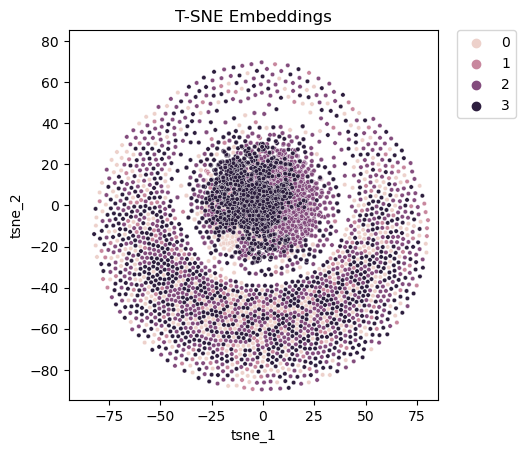

In [79]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_res[:,0], 'tsne_2': tsne_res[:,1], 'label': node_labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_res.min()-5, tsne_res.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_title('T-SNE Embeddings')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)